In [2]:
#linear regression is a supervised regression model, but logistic regression is a supervised classification model
#predicting the value of a certain image - classifying it based on training data

import torch
#The torchvision package consists of popular datasets, model architectures, and common image transformations 
#for computer vision.
import torchvision
#import the MNIST dataset, which has all of the images - very popular, like the iris dataset
from torchvision.datasets import MNIST
import numpy

In [3]:
#actually download the dataset inside the data directory
dataset = MNIST(root='data/', download=True)

In [4]:
#look in your ml-notebooks directory - there is a directory called data. This is where we will store all of 
#the datasets that need separate files. The linear regression model was trained on very small amounts of data
#and they were both tensors, so its easier to just store the data locally

In [5]:
#The dataset has 60,000 images! We will have an ample amount of training data
print(len(dataset))

60000


In [6]:
#this dows not need to be download
test = MNIST(root='data/', train=False)
print(len(test))

10000


In [7]:
print(dataset[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x11CCED9B0>, 5)


Label: 0


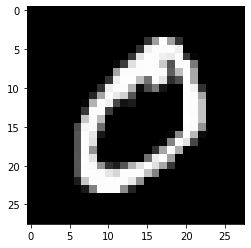

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

image, label = dataset[1]

plt.imshow(image, cmap='gray')
print("Label:", label)

In [9]:
import torchvision.transforms as transforms

dataset = MNIST(root="data/", train=True, transform=transforms.ToTensor())
ten, lab = dataset[0]


In [10]:
#Print the pixels at the 10th to 15th y axis 
print(ten[:,10:15, 10:15])
#1 represents white, and 0 represents black - the some of these values are just in between

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


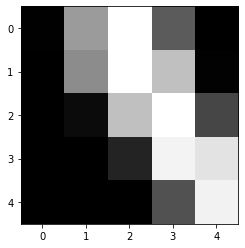

In [11]:
plt.imshow(ten[0,10:15,10:15], cmap='gray')

In [12]:
#split set into 3 models - training set, validation set, test set
#training set - used to train the model , compute the loss, adjust the weights 
#validation set - evaluate the model while training, adjust parameters like the learning rate, and pick the best model
#test set - used to compare models

In [13]:
import numpy as np

def split_indices(n, val_pct):
    #split the val into a training dataset and a validation dataset
    n_val = int(val_pct*n)
    
    #random images for the validation set and for the training dataset 
    idxs = np.random.permutation(n)
    
    #returns the first n_vals in a tuple, so basically a fraction of the entire dataset, and splits the rest for
    #the training set
    return idxs[n_val:], idxs[:n_val]

In [14]:
train_indices, val_indices = split_indices(len(dataset), 0.2)

In [15]:
#randomize the data in order to remove bias

#sample randomly from indices
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [16]:
batches = 100

#randomize the data samples
train_sampler = SubsetRandomSampler(train_indices)
train_loader= DataLoader(dataset, batches, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batches, sampler=val_sampler)


In [17]:
#Define the model

#The logistic regression model is very similar to the linear regression model

#there are weights and there are biases - output is obtained by using matrix operations

#we can use nn.Linear to crreate the model - and flattened to a vector of size 784

In [18]:
import torch.nn as nn

#the output of each image is a vector of size 10, with each element of the vector signifying the probability of 
#a particular target label - 0 to 9

input_size = 28*28 #flatten the image

num_classes = 10

# model = nn.Linear(input_size, num_classes)

#super similar to the linear regression model - but this time the inputs and the outputs are way more


In [19]:
# for imgs, labels in train_loader:
#     print(labels)
#     print(imgs.shape)
#     outputs = model(imgs)
#     break

In [21]:
#Since the linear method is expecting a vector, we can't just pass in a tensor that has 3 dimensions, 
#we need to flatten it out - we can do this by creating a model class that inherists from the nn.module class
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        #putting -1 allows us to use any batch size
        xb=xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
    
model = MnistModel()

for images, labels in train_loader:
    outputs = model(images)
    break
    
print(outputs.shape, outputs[:1].data) 


#the outputs are the random result of passing in the images into the model. However, we need them to represent
#a probability, which is between 1 and 0

torch.Size([100, 10]) tensor([[ 0.2487, -0.0149,  0.1907, -0.1085, -0.1805,  0.3893,  0.1323, -0.2773,
         -0.0447, -0.3165]])


In [ ]:
#softmax function